# Intermediate Model Random Forest

In [1]:
import sys
print(sys.executable)
# https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

/Users/kata/opt/anaconda3/bin/python


In [2]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [3]:
import pandas as pd
series = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/calls.csv', header=0, index_col=0)
#df['date'] = pd.to_datetime(df['date'])
#df = df.drop(columns=['n_sick', 'n_duty', 'n_sby', 'sby_need', 'dafted'])
#df = df.set_index('date')

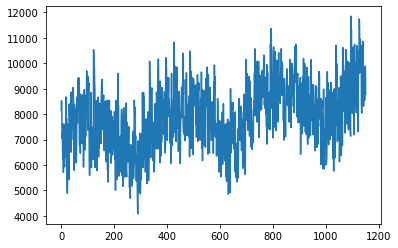

In [4]:
#series = read_csv('/Users/kata/Documents/Studium/Kurse/3. Semester/Model Engineering/use_case_2/sickness_table.csv', header=0, index_col=0)
values = series.values
# plot dataset
pyplot.plot(values)
pyplot.show()

In [5]:

# forecast monthly births with random forest


In [6]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [7]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]


In [8]:
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]


In [9]:
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	error2 = mean_squared_error(test[:, -1], predictions)
	return error, error2, test[:, -1], predictions
 

>expected=10524.0, predicted=8644.5
>expected=8316.0, predicted=9949.4
>expected=9102.0, predicted=8815.1
>expected=8664.0, predicted=8811.0
>expected=9480.0, predicted=8877.0
>expected=8544.0, predicted=8848.6
>expected=8814.0, predicted=8714.9
>expected=9846.0, predicted=8640.4
>expected=9882.0, predicted=8761.9
>expected=8790.0, predicted=9224.2
MAE: 771.327
MSE: 966702.166


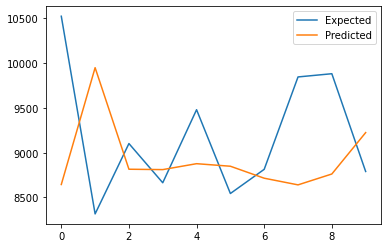

In [10]:

# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, mse, y, yhat = walk_forward_validation(data, 10)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [11]:
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new prediction
row = values[-6:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))


Input: [9480 8544 8814 9846 9882 8790], Predicted: 8479.038


In [12]:
# zweiter Versuch
series = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/calls_RF.csv', header=0, index_col=0)



In [44]:
X = series.index.values.reshape(-1,1)
y = series.calls.values.reshape(-1,1)

In [45]:
# train test split
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [46]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressor = RandomForestRegressor(n_estimators=200, random_state=80)

In [18]:
regressor.fit(x_train, y_train)

<ipython-input-18-e3a26b00eeb3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=80)

In [19]:
y_pred = regressor.predict(x_test)

y_pred

array([9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12, 9147.12,
       9147.12, 9147

In [20]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1192.1350649350652
Mean Squared Error: 2130966.075179222
Root Mean Squared Error: 1459.7828863153663


In [21]:
# SVR
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt



In [22]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [23]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

/Users/kata/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [24]:
y_pred = regressor.predict(x_test)


In [25]:
mean_squared_error(y_test, y_pred)      

2067763.3856552178

In [54]:
#predict calls with XGBoost
import xgboost
from xgboost import XGBRegressor


model = XGBRegressor()
model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [59]:
model.get_booster().get_dump()

['0:[f0<726.5] yes=1,no=2,missing=1\n\t1:[f0<333.5] yes=3,no=4,missing=3\n\t\t3:[f0<202.5] yes=5,no=6,missing=5\n\t\t\t5:leaf=2259.90967\n\t\t\t6:leaf=1949.18298\n\t\t4:[f0<582.5] yes=7,no=8,missing=7\n\t\t\t7:leaf=2426.17139\n\t\t\t8:leaf=2147.59863\n\t2:leaf=2632.7063\n',
 '0:[f0<696.5] yes=1,no=2,missing=1\n\t1:[f0<359.5] yes=3,no=4,missing=3\n\t\t3:[f0<193.5] yes=5,no=6,missing=5\n\t\t\t5:[f0<29.5] yes=9,no=10,missing=9\n\t\t\t\t9:leaf=1310.97791\n\t\t\t\t10:leaf=1632.4198\n\t\t\t6:leaf=1398.50012\n\t\t4:[f0<581.5] yes=7,no=8,missing=7\n\t\t\t7:leaf=1723.24707\n\t\t\t8:leaf=1436.75208\n\t2:leaf=1838.59338\n',
 '0:[f0<696.5] yes=1,no=2,missing=1\n\t1:[f0<693.5] yes=3,no=4,missing=3\n\t\t3:[f0<332.5] yes=5,no=6,missing=5\n\t\t\t5:[f0<256.5] yes=7,no=8,missing=7\n\t\t\t\t7:leaf=1095.7887\n\t\t\t\t8:[f0<303.5] yes=11,no=12,missing=11\n\t\t\t\t\t11:leaf=805.521301\n\t\t\t\t\t12:leaf=1021.86688\n\t\t\t6:[f0<592.5] yes=9,no=10,missing=9\n\t\t\t\t9:leaf=1193.7627\n\t\t\t\t10:leaf=1007.2590

In [60]:
yhat = model.predict(x_test)
